In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

In [5]:
dataset = pd.read_csv(
    './data/ConfLongDemo_JSI.csv',
    sep=',',
    names=["seq", "tag", "timestamp", "date", "x", "y", "z", "activity"])

In [6]:
# Encoding seq
dataset['seq'] = dataset['seq'].astype('category')
dataset['seq'] = dataset['seq'].cat.codes
# Encoding activity
dataset['activity'] = dataset['activity'].astype('category')
dataset['activity'] = dataset['activity'].cat.codes
# Encoding tag
dataset['tag'] = dataset['tag'].astype('category')
dataset['tag'] = dataset['tag'].cat.codes
# del dataset['timestamp']
#normalizing timestamp
dataset['timestamp'] = (dataset['timestamp'] -
                  dataset['timestamp'].mean()) / dataset['timestamp'].std()

# normalizing seq
dataset['seq'] = (dataset['seq'] -
                  dataset['seq'].mean()) / dataset['seq'].std()
# normalizing tag
dataset['tag'] = (dataset['tag'] -
                  dataset['tag'].mean()) / dataset['tag'].std()
# normalizing x
dataset['x'] = (dataset['x'] - dataset['x'].mean()) / dataset['x'].std()
# normalizing y
dataset['y'] = (dataset['y'] - dataset['y'].mean()) / dataset['y'].std()
# normalizing z
dataset['z'] = (dataset['z'] - dataset['z'].mean()) / dataset['z'].std()

print(dataset)

             seq       tag  timestamp                     date         x  \
0      -1.774225 -1.302171   0.525583  27.05.2009 14:03:25:127  1.366019   
1      -1.774225  1.427813   0.525593  27.05.2009 14:03:25:183  1.615982   
2      -1.774225  0.517818   0.525598  27.05.2009 14:03:25:210  1.689269   
3      -1.774225 -1.302171   0.525602  27.05.2009 14:03:25:237  1.393201   
4      -1.774225 -0.392177   0.525607  27.05.2009 14:03:25:263  1.651463   
...          ...       ...        ...                      ...       ...   
164855  1.501425 -0.392177  -0.917507  27.05.2009 11:50:41:957  0.434528   
164856  1.501425 -1.302171  -0.917503  27.05.2009 11:50:41:983  0.628153   
164857  1.501425  1.427813  -0.917498  27.05.2009 11:50:42:010  0.412067   
164858  1.501425 -0.392177  -0.917488  27.05.2009 11:50:42:063  0.369800   
164859  1.501425 -1.302171  -0.917483  27.05.2009 11:50:42:090  0.435095   

               y         z  activity  
0       0.412769  0.235318        10  
1       0

In [7]:
s = dataset['date']
print(s,type(s))
s = s.tolist()
# this proves that date is same. only time differs
print(len(s))
r = ''
for i in range(len(s)):
    r = (s[i].split())[1]
    r = r.split(':')
    t = r[0]+r[1]+r[2]+r[3]
    s[i] = int(t)
del dataset['date']
dataset['date'] = s
dataset['date'] = (dataset['date'] - dataset['date'].mean()) / dataset['date'].std()

0         27.05.2009 14:03:25:127
1         27.05.2009 14:03:25:183
2         27.05.2009 14:03:25:210
3         27.05.2009 14:03:25:237
4         27.05.2009 14:03:25:263
                   ...           
164855    27.05.2009 11:50:41:957
164856    27.05.2009 11:50:41:983
164857    27.05.2009 11:50:42:010
164858    27.05.2009 11:50:42:063
164859    27.05.2009 11:50:42:090
Name: date, Length: 164860, dtype: object <class 'pandas.core.series.Series'>
164860


In [8]:
print(dataset)
target = dataset['activity']
del dataset['activity']

             seq       tag  timestamp         x         y         z  activity  \
0      -1.774225 -1.302171   0.525583  1.366019  0.412769  0.235318        10   
1      -1.774225  1.427813   0.525593  1.615982  0.177858  2.443221        10   
2      -1.774225  0.517818   0.525598  1.689269  0.273506  1.452321        10   
3      -1.774225 -1.302171   0.525602  1.393201  0.386521  0.128646        10   
4      -1.774225 -0.392177   0.525607  1.651463  0.792755  0.184251        10   
...          ...       ...        ...       ...       ...       ...       ...   
164855  1.501425 -0.392177  -0.917507  0.434528  0.733890 -0.937181        10   
164856  1.501425 -1.302171  -0.917503  0.628153  0.649793 -0.060796        10   
164857  1.501425  1.427813  -0.917498  0.412067  0.461913  2.465883        10   
164858  1.501425 -0.392177  -0.917488  0.369800  0.494516 -0.957927        10   
164859  1.501425 -1.302171  -0.917483  0.435095  0.512274 -0.140938        10   

            date  
0       

In [9]:
x_train, x_test, y_train, y_test = train_test_split(dataset, target, test_size=0.25, random_state=0)

In [10]:
clf = LogisticRegression(penalty='l2', solver='saga',multi_class='multinomial')

In [11]:
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
target_names = []
for i in range(11):
    target_names.append(str(i))

In [13]:
score = clf.score(x_test,y_test)
print(score)
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
c_matrix = confusion_matrix(y_test, y_pred)
print("\n", c_matrix)

0.4087346839742812
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       743
           1       0.40      0.79      0.53     13551
           2       0.00      0.00      0.00      1529
           3       0.33      0.19      0.24      1299
           4       0.43      0.25      0.32      6781
           5       0.00      0.00      0.00       419
           6       0.37      0.12      0.18      2930
           7       0.00      0.00      0.00      4612
           8       0.00      0.00      0.00       351
           9       0.00      0.00      0.00       671
          10       0.43      0.46      0.45      8329

    accuracy                           0.41     41215
   macro avg       0.18      0.16      0.16     41215
weighted avg       0.33      0.41      0.34     41215


 [[    0   387     0     0   191     0    21     0     0     0   144]
 [    1 10694     2   267   796     0   466     0     0     0  1325]
 [    0  1067     0    29   

/home/h4v0k/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
clf = LogisticRegression(penalty='l2', solver='liblinear',multi_class='ovr')
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print(score)

y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
c_matrix = confusion_matrix(y_test, y_pred)
print("\n", c_matrix)

0.4059929637267985


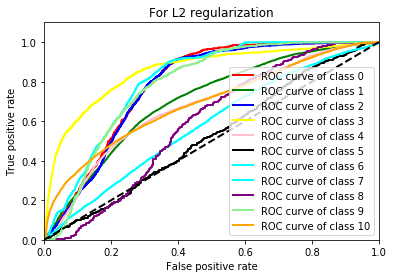

In [11]:
logreg = LogisticRegression(penalty="l2",solver="liblinear",multi_class="ovr")
y = label_binarize(y_train,classes=range(11))
y_t = label_binarize(y_test,classes=range(11))
out = OneVsRestClassifier(logreg).fit(x_train,y_train).decision_function(x_test)


# In[30]:


fpr= dict()
tpr = dict()
roc_auc = dict()
for i in range(11):
    fpr[i],tpr[i],t = roc_curve(y_t[:,i],out[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])
col = ["red","green","blue","yellow","pink","black","aqua","cyan","purple","lightgreen","orange"]
for i,c in zip(range(11),col):
    plt.plot(fpr[i],tpr[i],color=c,lw=2,label=("ROC curve of class "+str(i)))
plt.plot([0,1],[0,1],'k--',lw=2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('For L2 regularization')
plt.legend(loc="lower right")
plt.show()



In [12]:
clf = LogisticRegression(penalty='l2', solver='newton-cg',multi_class='multinomial')
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print(score)

y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
c_matrix = confusion_matrix(y_test, y_pred)
print("\n", c_matrix)
X_train = x_train

0.4087346839742812


In [13]:
clf = LogisticRegression(penalty='l2', solver='lbfgs',multi_class='multinomial')
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print(score)

y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
c_matrix = confusion_matrix(y_test, y_pred)
print("\n", c_matrix)

0.4086618949411622


/home/h4v0k/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [14]:
# Now decision tree
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=100)
decision_tree = decision_tree.fit(x_train, y_train)

In [15]:
r = export_text(decision_tree)
print(r)

|--- feature_5 <= 0.70
|   |--- feature_4 <= 1.07
|   |   |--- feature_3 <= 1.28
|   |   |   |--- feature_3 <= 0.15
|   |   |   |   |--- feature_4 <= 0.52
|   |   |   |   |   |--- feature_1 <= 0.06
|   |   |   |   |   |   |--- feature_6 <= -1.05
|   |   |   |   |   |   |   |--- feature_4 <= -0.17
|   |   |   |   |   |   |   |   |--- feature_3 <= -0.03
|   |   |   |   |   |   |   |   |   |--- feature_3 <= -0.99
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= -0.56
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  -0.56
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- feature_3 >  -0.99
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= -1.20
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  -1.20
|   |   |   |   |   |   |   |   |   | 

In [16]:
print(decision_tree.score(x_test, y_test))


y_pred = clf.predict(x_test)
c_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred,target_names=target_names))
print("\n", c_matrix)

0.8475069756156739


In [21]:
# Now random forest
clf = RandomForestClassifier(n_estimators=100, max_depth=100,random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [22]:
print(clf.feature_importances_)

[0.05758435 0.06361654 0.17732016 0.20566844 0.1654153  0.15388208
 0.17651313]


In [23]:
print(clf.score(x_test, y_test))

y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
c_matrix = confusion_matrix(y_test, y_pred)
print("\n", c_matrix)

0.9171903433216062


In [ ]:
# Now SVM
clf = SVC(C=0.1, gamma='scale', kernel='rbf')
clf.fit(x_train, y_train) 

In [ ]:
print(clf.score(x_test, y_test))

In [ ]:
clf = SVC(C=0.1, gamma='scale', kernel='linear')
clf.fit(x_train, y_train)

In [ ]:
print(clf.score(x_test, y_test))

In [ ]:
clf = SVC(C=0.1, gamma='scale', degree=2, kernel='poly')
clf.fit(x_train, y_train)

In [ ]:
print(clf.score(x_test, y_test))

In [ ]:
clf = SVC(C=0.1, gamma='scale', degree=3, kernel='poly')
clf.fit(x_train, y_train)

In [ ]:
print(clf.score(x_test, y_test))

In [ ]:
clf = SVC(C=0.1, gamma='scale', kernel='sigmoid')
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

In [20]:
for k in range(1,30):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    score = metrics.accuracy_score(y_test,y_pred)
    print(k,score)

1 0.7596506126410287
2 0.7436370253548465
3 0.7624651219216305
4 0.7621739657891544
5 0.7627562780541065
6 0.7612762343806866
7 0.7613490234138056
8 0.7605483440494966
9 0.7584131990780055
10 0.7582190949896882
11 0.7558413199078006
12 0.7548950624772535
13 0.7538032269804683
14 0.7522018682518501
15 0.7517166080310567
16 0.7507218245784302
17 0.7505034574790731
18 0.7482227344413441
19 0.7472522139997574
20 0.7454567511828218
21 0.7447288608516317
22 0.7429333980346962
23 0.7424724008249424
24 0.7415746694164745
25 0.7403857818755307
26 0.7389785272352299
27 0.7383962149702779
28 0.7371830644182943
29 0.7360184398883901


In [14]:
reg1 = MLPClassifier(hidden_layer_sizes=(256, 128, 64), solver='sgd',learning_rate='constant', learning_rate_init=0.1, batch_size=128,verbose=True)
reg1.fit(x_train, y_train)
t = reg1.score(x_train,y_train)
tt = reg1.score(x_test, y_test)
print('Training accuracy:',t)
print('Testing accuracy:',tt)

Iteration 1, loss = 1.12933313
Iteration 2, loss = 0.98215324
Iteration 3, loss = 0.93413496
Iteration 4, loss = 0.90540399
Iteration 5, loss = 0.88537386
Iteration 6, loss = 0.86657092
Iteration 7, loss = 0.85435328
Iteration 8, loss = 0.84337504
Iteration 9, loss = 0.83501406
Iteration 10, loss = 0.82292561
Iteration 11, loss = 0.81717090
Iteration 12, loss = 0.80865750
Iteration 13, loss = 0.80301506
Iteration 14, loss = 0.79901196
Iteration 15, loss = 0.79551537
Iteration 16, loss = 0.78961644
Iteration 17, loss = 0.78349389
Iteration 18, loss = 0.78136216
Iteration 19, loss = 0.78017442
Iteration 20, loss = 0.77463158
Iteration 21, loss = 0.77215968
Iteration 22, loss = 0.76783467
Iteration 23, loss = 0.76535610
Iteration 24, loss = 0.76297053
Iteration 25, loss = 0.76124127
Iteration 26, loss = 0.75881240
Iteration 27, loss = 0.75792536
Iteration 28, loss = 0.75401143
Iteration 29, loss = 0.75163653
Iteration 30, loss = 0.75478008
Iteration 31, loss = 0.74737394
Iteration 32, los

In [15]:
reg2 = MLPClassifier(hidden_layer_sizes=(256, 128, 64),verbose=True)
reg2.fit(x_train, y_train)
t = reg2.score(x_train,y_train)
tt = reg2.score(x_test, y_test)
print('Training accuracy:',t)
print('Testing accuracy:',tt)

Iteration 1, loss = 1.24670429
Iteration 2, loss = 1.03399076
Iteration 3, loss = 0.97601359
Iteration 4, loss = 0.94497816
Iteration 5, loss = 0.92225516
Iteration 6, loss = 0.90251930
Iteration 7, loss = 0.88890946
Iteration 8, loss = 0.87471498
Iteration 9, loss = 0.86457894
Iteration 10, loss = 0.85347610
Iteration 11, loss = 0.84515630
Iteration 12, loss = 0.83560771
Iteration 13, loss = 0.83089577
Iteration 14, loss = 0.82180363
Iteration 15, loss = 0.81701551
Iteration 16, loss = 0.81085111
Iteration 17, loss = 0.80592118
Iteration 18, loss = 0.79851626
Iteration 19, loss = 0.79362419
Iteration 20, loss = 0.78827595
Iteration 21, loss = 0.78521441
Iteration 22, loss = 0.78018383
Iteration 23, loss = 0.77460658
Iteration 24, loss = 0.77187158
Iteration 25, loss = 0.76651761
Iteration 26, loss = 0.76335082
Iteration 27, loss = 0.76050117
Iteration 28, loss = 0.75713288
Iteration 29, loss = 0.75228838
Iteration 30, loss = 0.74945818
Iteration 31, loss = 0.74674192
Iteration 32, los

/home/h4v0k/.local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy: 0.8013344656071818
Testing accuracy: 0.7624408589105908


In [18]:
reg3 = MLPClassifier(hidden_layer_sizes=(256, 128 , 64, 32),verbose=True, max_iter=500)
reg3.fit(x_train, y_train)
t = reg3.score(x_train,y_train)
tt = reg3.score(x_test, y_test)
print('Training accuracy:',t)
print('Testing accuracy:',tt)

Iteration 1, loss = 1.25095618
Iteration 2, loss = 1.03519431
Iteration 3, loss = 0.97855259
Iteration 4, loss = 0.94773418
Iteration 5, loss = 0.92231393
Iteration 6, loss = 0.90498872
Iteration 7, loss = 0.88954722
Iteration 8, loss = 0.87447258
Iteration 9, loss = 0.86390017
Iteration 10, loss = 0.85532233
Iteration 11, loss = 0.84642180
Iteration 12, loss = 0.83757522
Iteration 13, loss = 0.82901198
Iteration 14, loss = 0.82341101
Iteration 15, loss = 0.81621204
Iteration 16, loss = 0.81000789
Iteration 17, loss = 0.80574710
Iteration 18, loss = 0.79872928
Iteration 19, loss = 0.79560573
Iteration 20, loss = 0.79121659
Iteration 21, loss = 0.78542477
Iteration 22, loss = 0.77971909
Iteration 23, loss = 0.77682858
Iteration 24, loss = 0.77065513
Iteration 25, loss = 0.76708809
Iteration 26, loss = 0.76417979
Iteration 27, loss = 0.75947115
Iteration 28, loss = 0.75607094
Iteration 29, loss = 0.75122344
Iteration 30, loss = 0.74724942
Iteration 31, loss = 0.74351276
Iteration 32, los

Iteration 253, loss = 0.54196299
Iteration 254, loss = 0.54182653
Iteration 255, loss = 0.54181859
Iteration 256, loss = 0.54193608
Iteration 257, loss = 0.54204230
Iteration 258, loss = 0.54015253
Iteration 259, loss = 0.54139265
Iteration 260, loss = 0.54085272
Iteration 261, loss = 0.53975011
Iteration 262, loss = 0.53879145
Iteration 263, loss = 0.53976455
Iteration 264, loss = 0.54019759
Iteration 265, loss = 0.53984007
Iteration 266, loss = 0.53803159
Iteration 267, loss = 0.53732893
Iteration 268, loss = 0.53675354
Iteration 269, loss = 0.53622460
Iteration 270, loss = 0.53625802
Iteration 271, loss = 0.53716799
Iteration 272, loss = 0.53659638
Iteration 273, loss = 0.53643892
Iteration 274, loss = 0.53610654
Iteration 275, loss = 0.53387578
Iteration 276, loss = 0.53605537
Iteration 277, loss = 0.53540353
Iteration 278, loss = 0.53535544
Iteration 279, loss = 0.53676339
Iteration 280, loss = 0.53355215
Iteration 281, loss = 0.53516833
Iteration 282, loss = 0.53305386
Iteration 

In [19]:
reg3 = MLPClassifier(hidden_layer_sizes=(256, 128 , 64, 32,16),verbose=True, max_iter=500)
reg3.fit(x_train, y_train)
t = reg3.score(x_train,y_train)
tt = reg3.score(x_test, y_test)
print('Training accuracy:',t)
print('Testing accuracy:',tt)

Iteration 1, loss = 1.39719672
Iteration 2, loss = 1.08525832
Iteration 3, loss = 1.02056133
Iteration 4, loss = 0.97694399
Iteration 5, loss = 0.95305295
Iteration 6, loss = 0.92942135
Iteration 7, loss = 0.91285012
Iteration 8, loss = 0.89992696
Iteration 9, loss = 0.88655407
Iteration 10, loss = 0.87679236
Iteration 11, loss = 0.86818569
Iteration 12, loss = 0.85815966
Iteration 13, loss = 0.85063061
Iteration 14, loss = 0.84369632
Iteration 15, loss = 0.83755394
Iteration 16, loss = 0.82979375
Iteration 17, loss = 0.82697754
Iteration 18, loss = 0.81965340
Iteration 19, loss = 0.81257855
Iteration 20, loss = 0.80961278
Iteration 21, loss = 0.80377553
Iteration 22, loss = 0.79978783
Iteration 23, loss = 0.79534379
Iteration 24, loss = 0.79207032
Iteration 25, loss = 0.78783055
Iteration 26, loss = 0.78324696
Iteration 27, loss = 0.77998522
Iteration 28, loss = 0.77723875
Iteration 29, loss = 0.77260668
Iteration 30, loss = 0.76773106
Iteration 31, loss = 0.76604858
Iteration 32, los

Iteration 253, loss = 0.56060653
Iteration 254, loss = 0.55980193
Iteration 255, loss = 0.56131823
Iteration 256, loss = 0.56058134
Iteration 257, loss = 0.55894837
Iteration 258, loss = 0.55950526
Iteration 259, loss = 0.55974484
Iteration 260, loss = 0.55661001
Iteration 261, loss = 0.55640928
Iteration 262, loss = 0.55783024
Iteration 263, loss = 0.55732289
Iteration 264, loss = 0.55688267
Iteration 265, loss = 0.55831613
Iteration 266, loss = 0.55638663
Iteration 267, loss = 0.55444069
Iteration 268, loss = 0.55464576
Iteration 269, loss = 0.55493173
Iteration 270, loss = 0.55374060
Iteration 271, loss = 0.55403355
Iteration 272, loss = 0.55350680
Iteration 273, loss = 0.55338955
Iteration 274, loss = 0.55387925
Iteration 275, loss = 0.55297635
Iteration 276, loss = 0.55236369
Iteration 277, loss = 0.55276278
Iteration 278, loss = 0.55184893
Iteration 279, loss = 0.55235612
Iteration 280, loss = 0.55191430
Iteration 281, loss = 0.55094137
Iteration 282, loss = 0.55014366
Iteration 

In [ ]:
print('Training accuracy:',t)
print('Testing accuracy:',tt)